<a href="https://colab.research.google.com/github/thomreid11/CMP7005_PRES1_Repository/blob/main/CMP7005_PRES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thomas Reid - CMP7005 - PRES1**

Exploratory Data Analysis (EDA) on India Air Quality Dataset

This EDA will investigate the air quality of 26 different Indian cities from 2017 to 2020. It will address health and environmental concerns linked to poor air quality in one of the worlds most polluted countries. In major efforts to improve public health and living conditions, the analysis will look at the different factors involved in creating bad air quality and pollution.

Using data driven insights, identifying patterns and predictive modelling, the environmental challenges India faces will be addressed.

#### **Importing the required libraries for the EDA**

In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
# Ignore all panda warnings (cleaner look)
warnings.simplefilter(action='ignore', category=FutureWarning)


#### **Mounting Google Drive to Google Collab and importing dataset**

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
drive_path = '/content/drive/MyDrive/India Air Quality Dataset'

#### **Merging all csv files in folder into singular csv file using dataframes**

This process takes all 26 csv files from the 'drive_path' and reads them into a identical dataframes, using Pandas. Once processed, each file is concatenated into one dataframe. A new csv files is produced with all datasets.

In [73]:
dataframes = []
# For the files in the foler drive_path, if it ends in csv, then the file is appended into the dataframe
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)
# Concatenating dataframes
df = pd.concat(dataframes,ignore_index=True)

In [74]:
# Dataframe to csv file
df_to_csv = df.to_csv('air_quality_data.csv')

#### **General Data Insights**

This section explores fundamental data understanding through examining basic attributes of the dataset such as data types and descriptive statistics.

**Key**

City - The name of the location where the air quality measurements were recorded

Date - The specific day on which the data was collected

PM2.5 - Concentration of fine particulate matter smaller than 2.5 micrometers

PM10 - Concentration of particulate matter smaller than 10 micrometers. From dust, pollen

NO - Nitric oxide concentration. From combustion processes

NO2 - Nitrogen dioxide concentration. From vehicles and industrial activities

NOx - Combined concentration of nitrogen oxides (NO + NO2). Leads to smog and respiratory issues

NH3 - Ammonia concentration. From agricultural and industrial emissions

CO - Carbon monoxide concentration. From incomplete combustion

SO2 - Sulfur dioxide concentration. From coal burning

O3 - Ozone concentration. Formed in the atmosphere, high levels indicate poor air quality

Benzene - Concentration of benzene. Carcinogenic

Toluene - Concentration of toluene. Solvent from industrial emissions

Xylene - Concentration of xylene. From vehicle exhaust

AQI - Air Quality Index value calculated from pollutant levels, representing overall air quality.

AQI_Bucket - Category describing the air quality level (e.g., "Good", "Satisfactory", "Moderate", "Poor", etc.) based on the AQI value.




In [75]:
# First 5 rows of dataframe
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Gurugram,27/11/2015,NaN,NaN,5.28,8.37,9.57,NaN,2.88,15.92,5.96,NaN,NaN,NaN,NaN,NaN
1,Gurugram,28/11/2015,NaN,NaN,4.71,8.00,9.74,NaN,0.47,5.78,8.13,NaN,NaN,NaN,NaN,NaN
2,Gurugram,29/11/2015,NaN,NaN,3.10,8.04,8.69,NaN,1.67,5.26,16.52,NaN,NaN,NaN,NaN,NaN
3,Gurugram,30/11/2015,NaN,NaN,3.90,8.21,9.54,NaN,1.45,7.51,6.29,NaN,NaN,NaN,NaN,NaN
4,Gurugram,01/12/2015,NaN,NaN,3.36,8.13,8.86,NaN,1.45,3.72,10.50,NaN,NaN,NaN,NaN,NaN


In [76]:
# Last 5 rows of dataframe
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Amaravati,27/06/2020,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.75,33.76,0.06,0.27,0.15,42.0,Good
29527,Amaravati,28/06/2020,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.86,37.34,0.10,0.43,0.12,49.0,Good
29528,Amaravati,29/06/2020,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.79,43.29,0.12,0.69,0.10,56.0,Satisfactory
29529,Amaravati,30/06/2020,21.34,35.16,1.74,10.69,7.10,13.38,0.66,14.58,45.32,0.14,1.42,0.20,61.0,Satisfactory
29530,Amaravati,01/07/2020,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory


In [77]:
# Number of Rows
df.shape[0]

29531

In [78]:
# NUmber of Columns
df.shape[1]

16

In [79]:
# Data type for each column and how many entries for each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**What can we see from this?**

We know that the data has 29,531 rows, however we can see from the code above that not all of the variables (rows) have the same amount of data entries. This means that there is missing values. We can see throughout the list the number of values varies inconsistantly, with PM10 (18,391) and xylene (11,422) having the lowest and CO (27,472) and NO (25,949) having the highest number of values. Overall, the large amount of values in each column tell us this is a reliable dataset and we can start carrying out analysis.

The data types for each entry are also correct so no formatting is needed to correct this.


#### **Preprocessing the data**



In [80]:
# Finding out the percentage of missing values per column
def missing_values_percentage_table(df):

# Finding the number of missing values per column
    missing_values = df.isnull().sum()

# Finding the percentage of missing values by dividing it by the number of data entries there should be and multiplying by 100
    missing_value_perc =  (100 * missing_values / len(df))

# Concatenating the missing values and missing values %  along the top of the table
    missing_value_table = pd.concat([missing_values, missing_value_perc], axis=1)
    missing_value_table = missing_value_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

# Sort the table by percentage of missing descending
    missing_values_table = missing_value_table.sort_values('% of Total Values', ascending=False)
    return missing_values_table

# Call the function with the dataframe 'df' and making the percentages to 2dp
missing_percentage_df = missing_values_percentage_table(df).round(2)


display(missing_percentage_df.style.background_gradient(cmap='Blues'))

,Missing Values,% of Total Values
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


**What does this table tell us?**

With Xyelene having over 50% of values missing, this column will be dropped as it cannot be reliably analysed. The columns with 10% - 40% of values missing (PM10, NH3, Toluene, Benzene, AQI / AQI_Bucket, PM2.5, NOx, O3, SO2, NO2, NO) will be interpolated to fill these quantities. CO, Date and City have a high level of values and good quality data analysis can be explored without interpolation.

In [81]:
# Number of missing values per city
def missing_per_city(df):
  # Finding number of missing values per city
  missing_city = df.groupby("City").apply(lambda x: x.isnull().sum().sum(), include_groups=False).sort_values(ascending=False)

  # Finding percentage
  missing_city_perc = 100 * missing_city / len(df)

  # Concatenating the missing values and missing values %  along the top of the table
  missing_city_table = pd.concat([missing_city, missing_city_perc], axis=1)
  missing_city_table = missing_city_table.rename(columns={0: 'Missing Values per city', 1: '% of values missing per city'})
  return missing_city_table

# Call the function with the dataframe 'df' and round the percentages to 2dp
missing_city_df = missing_per_city(df).round(2)

# Reset the index to make 'City' a regular column and put its title on the same row as others
missing_city_df = missing_city_df.reset_index()

display(missing_city_df.style.background_gradient(cmap='Reds'))

,City,Missing Values per city,% of values missing per city
0,Mumbai,14201,48.090000
1,Ahmedabad,10784,36.520000
2,Jorapokhar,8603,29.130000
3,Gurugram,6843,23.170000
4,Patna,6214,21.040000
5,Lucknow,6082,20.600000
6,Chennai,5301,17.950000
7,Brajrajnagar,4281,14.500000
8,Talcher,4014,13.590000
9,Thiruvananthapuram,3805,12.880000


This table tells us the cities that have the most number of values missing and the percentage of values missing per city. Cities like Mumbai, Ahmedabad, and Jorapokhar have the highest number of missing values, with nearly 45%, 35%, and 25% of their entries missing, respectively. In contrast, smaller cities such as Chandigarh and Aizawl have almost complete data, with less than 1% missing.

As the most is Mumbai with less than 50% this City will remain in the table.

#### **Interpolating missing values**

This section will start by removing Xylene from the dataframe as we saw that it has too many missing values to interpolate and therefore no use for through data analysis.

The forward fill method (ffill) will then be used to calculate the missing values within the data set. The 'ffill' method uses the last known value and fills in the missing value until the next known value is present.
Within this dataset the most likely reason for the missing values is a slight technical malfunction that casues the data to not record for a short period of time or a problem in transmitting the data.

The forward fill method is good for replacing small gaps, eg a couple of hours.This way it preservals the temporal validity of the data and doesnt risk creating unrealistic spikes or even negative values in the data. However, on this point, it does mean overall trends are ignored and doesnt account for standard rise and fall of data. Furthermore, another downside is that if gaps are for longer than a couple of hours then the data becomes unrealistic.

Overall, it is a good and safe choice of interpolation to fill the missing values for this dataset.

In [82]:
# Removing Xylene from the dataframe
df = df.drop('Xylene', axis=1)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Gurugram,27/11/2015,NaN,NaN,5.28,8.37,9.57,NaN,2.88,15.92,5.96,NaN,NaN,NaN,NaN
1,Gurugram,28/11/2015,NaN,NaN,4.71,8.00,9.74,NaN,0.47,5.78,8.13,NaN,NaN,NaN,NaN
2,Gurugram,29/11/2015,NaN,NaN,3.10,8.04,8.69,NaN,1.67,5.26,16.52,NaN,NaN,NaN,NaN
3,Gurugram,30/11/2015,NaN,NaN,3.90,8.21,9.54,NaN,1.45,7.51,6.29,NaN,NaN,NaN,NaN
4,Gurugram,01/12/2015,NaN,NaN,3.36,8.13,8.86,NaN,1.45,3.72,10.50,NaN,NaN,NaN,NaN


In [83]:
#Using the forward fill method on the dataframe
# List of columns to forward fill
columns_to_ffill = [
    "PM10", "NH3", "Toluene", "Benzene", "AQI", "AQI_Bucket", "CO", "Date", "City", "PM2.5", "NOx", "O3", "SO2", "NO2", "NO"
]

# Apply forward fill only on the specified columns
df[columns_to_ffill] = df[columns_to_ffill].fillna(method='ffill').fillna(method='bfill')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Gurugram,27/11/2015,120.47,395.40,5.28,8.37,9.57,39.69,2.88,15.92,5.96,0.86,8.63,202.0,Poor
1,Gurugram,28/11/2015,120.47,395.40,4.71,8.00,9.74,39.69,0.47,5.78,8.13,0.86,8.63,202.0,Poor
2,Gurugram,29/11/2015,120.47,395.40,3.10,8.04,8.69,39.69,1.67,5.26,16.52,0.86,8.63,202.0,Poor
3,Gurugram,30/11/2015,120.47,395.40,3.90,8.21,9.54,39.69,1.45,7.51,6.29,0.86,8.63,202.0,Poor
4,Gurugram,01/12/2015,120.47,395.40,3.36,8.13,8.86,39.69,1.45,3.72,10.50,0.86,8.63,202.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Amaravati,27/06/2020,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.75,33.76,0.06,0.27,42.0,Good
29527,Amaravati,28/06/2020,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.86,37.34,0.10,0.43,49.0,Good
29528,Amaravati,29/06/2020,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.79,43.29,0.12,0.69,56.0,Satisfactory
29529,Amaravati,30/06/2020,21.34,35.16,1.74,10.69,7.10,13.38,0.66,14.58,45.32,0.14,1.42,61.0,Satisfactory


In [84]:
# Re-checking missing values
missing_values = df.isnull().sum()
missing_values

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [85]:
df_to_csv = df.to_csv('air_quality_data_interpolated.csv')

# Exploratory Data Analysis

#### **Average pollution per city**

This first graph in this EDA shows the different types of pollution each city faces based of each pollutants mean unit across the time of data recording. In the aim to reduce pollution in these specified Indian cities, it is integral to know the cause behind their pollution.

**Pollutant Level Key**

**PM2.5 (µg/m³):**

Good: 0 – 30

Moderate: 31 – 60

Poor/Bad: 61+

**PM10 (µg/m³):**

Good: 0 – 50

Moderate: 51 – 100

Poor/Bad: 101+

**SO₂ (µg/m³):**

Good: 0 – 40

Moderate: 41 – 80

Poor/Bad: 81+

**NO₂ (µg/m³):**

Good: 0 – 40

Moderate: 41 – 80

Poor/Bad: 81+

**CO (mg/m³):**

Good: 0 – 1.0

Moderate: 1.1 – 2.0

Poor/Bad: 2.1+

**O₃ (µg/m³):**

Good: 0 – 50

Moderate: 51 – 100

Poor/Bad: 101+

In [86]:
city_stats = df.groupby('City')[['PM2.5', 'PM10', 'NOx', 'NO2', 'NH3', 'CO', 'SO2', 'O3']].mean().reset_index()

city_stats_format = pd.melt(city_stats,
                            id_vars = ['City'],
                            value_vars = ['PM2.5', 'PM10','SO2','NO2','CO','O3'],
                            var_name = 'Pollutant',
                            value_name = 'Average Concentration of pollutant')
fig_city = px.bar(city_stats_format,
                  x = 'City',
                  y = 'Average Concentration of pollutant',
                  color = 'Pollutant',
                  title = 'Average Pollution Levels per City',
                  barmode = 'stack')

fig_city.show()

**Chart Insights**



* From face value we can see that there is a large variation in pollution across the cities

* Delhi, Gurugram and Ahmedabad have the highlest levels of pollution with the first two having severe levels of PM2.5 and PM10, posing significsnt health risks.

* Aizawl, Kohima, and Shillong show substantially lower pollutant levels, suggesting cleaner air and better living conditions

* CO has very low and safe levels in all cities other than Ahmedabad

* SO2, NO2 and O3 all contribute far less to the pollutant levels but still rather prominent, with O3 being a huge factor in Bhopal



#### **Top 5 Most Polluted Cities Breakdown**



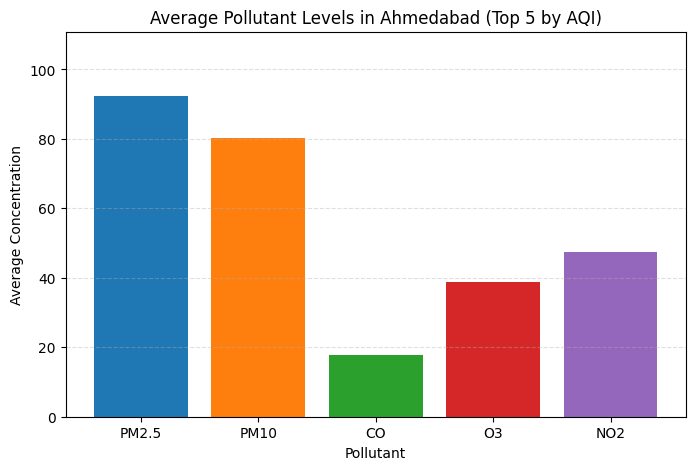

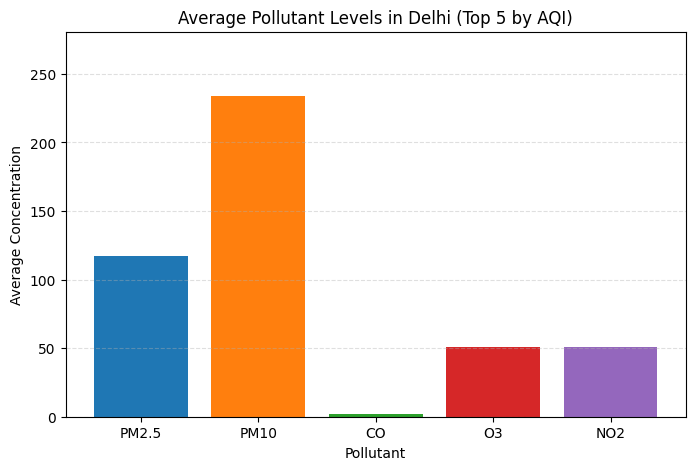

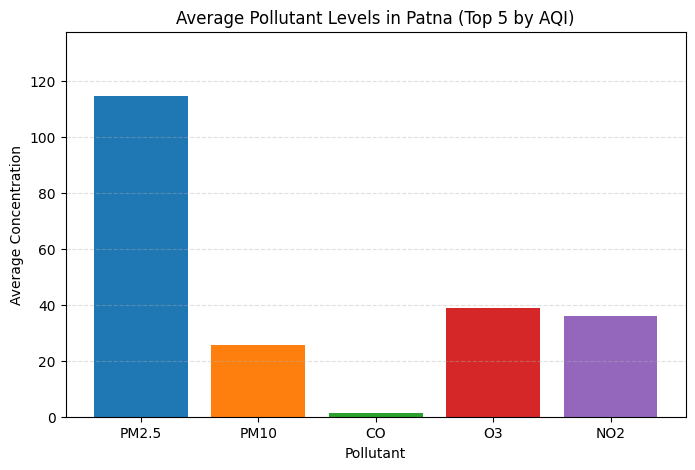

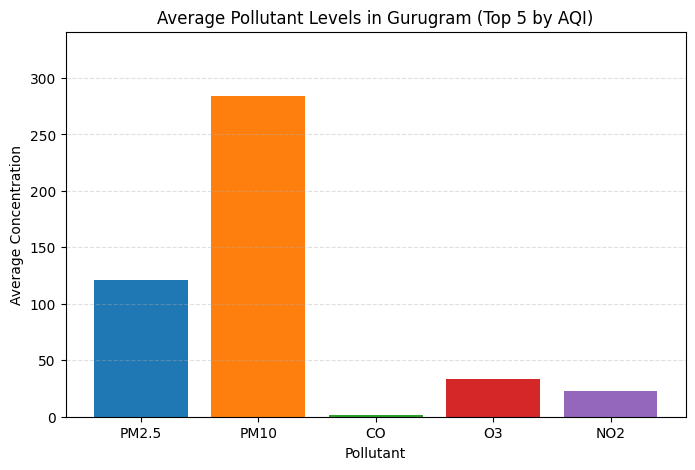

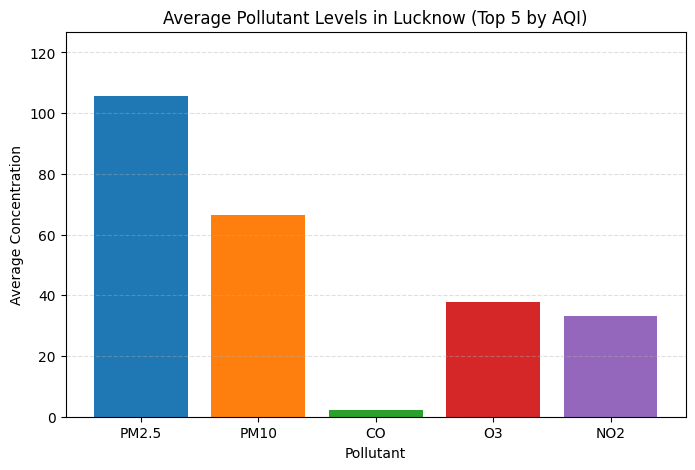

In [87]:
mean_aqi_by_city = df.groupby('City')['AQI'].mean()
top_5_cities = mean_aqi_by_city.sort_values(ascending=False).head(5).index.tolist()

# Pollutants to compare
pollutants = ['PM2.5', 'PM10', 'CO', 'O3', 'NO2']

# Defineing colours for each pollutant (same colors across all graphs)
pollutant_colours = {
    'PM2.5': 'tab:blue',
    'PM10' : 'tab:orange',
    'CO'   : 'tab:green',
    'O3'   : 'tab:red',
    'NO2'  : 'tab:purple'
}

# Filtering pollutants per city
for city_name in top_5_cities:

    # Filtering the df for the current city
    city_data = df[df['City'] == city_name]

    # Calculating average pollutant levels for the current city
    avg_pollutant_levels = {
        pollutant: city_data[pollutant].mean() for pollutant in pollutants
    }

    plt.figure(figsize=(8, 5))
    plt.bar(
        avg_pollutant_levels.keys(),
        avg_pollutant_levels.values(),
        color=[pollutant_colours[p] for p in avg_pollutant_levels.keys()]
    )
    plt.title(f'Average Pollutant Levels in {city_name} (Top 5 by AQI)')
    plt.xlabel('Pollutant')
    plt.ylabel('Average Concentration')
    plt.ylim(0, max(avg_pollutant_levels.values()) * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()


*   We can clearly see that PM2.5 and PM10 are the main instigators in pollution across the top 5
*  CO almost extinct in the top 5 apart from Ahmedabad where its almost 10 times past the considered 'poor' level
* O3 the next big factor for pollution

Knowing the causes of each of these factors, it is a startpoint of how to lower pollution levels

#### **Mean AQI per City**

The second bit of analysis will be the mean AQI per city. AQI (Air Quality Index) is  a tool that measures current air pollution levels and forecasts future levels to help the public understand the health risks associated with them. THe bar graph uses the mean AQI per city along with the AQI bucket to display a visual analysis of each cities AQI level.

0 - 50 = Good

51 - 100 = Moderate

101 - 150	= Unhealthy for Sensitive Groups

151 - 200 =	Unhealthy	High Risk

201 - 300 =	Very Unhealthy	Very High Risk

301 - 500 =	Hazardous

In [88]:
# Working out the mean AQI per city
df_mean = df.groupby('City')['AQI'].mean().reset_index()

#Making AQI bucket margins
def get_aqi_bucket(aqi):
    if 0 <= aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Moderate"
    elif 101 <= aqi <= 150:
        return "Unhealthy for Sensitive Groups (USG)"
    elif 151 <= aqi <= 200:
        return "Unhealthy"
    elif 201 <= aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

#Add bucket column to your df_mean
df_mean["AQI Bucket"] = df_mean["AQI"].apply(get_aqi_bucket)

# Colour key for AQI
aqi_colors = {
    "Good": "green",
    "Moderate": "yellow",
    "Unhealthy for Sensitive Groups (USG)": "Orange",
    "Unhealthy": "red",
    "Very Unhealthy": "purple",
    "Hazardous": "maroon"
}
# Interactive bar chart
fig = px.bar(
    df_mean,
    x='City',
    y='AQI',
    color='AQI Bucket',
    color_discrete_map=aqi_colors,
    title='Mean AQI per City'
)

fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis_title='City',
    yaxis_title='AQI',
    xaxis_tickangle=45,
)




**Insights from the graph**

The graph shows the mean Air Quality Index of the 25 different Indian cities ranging from good to hazardous. The majority of cities lie between the moderate and USG, with a minority falling in the very unhealthy and unhealthy category. The city of Ahmedabad is hazardous, with an AQI of 418.63, and the city of Aizawal is in the good category, with an AQI of just 35.22.

The graph indicates that it is very unsafe to live in Ahmedabad and those in the very unhealthy category, posing significant health risks especially to elderly, children and those with respiratory issues. We can see that those cities which fall in the North-eastern point of India have the best air quality and industrial cities such as Delhi and Ahmedabad have the worst.

#### **Linear Regression Model of PM2.5**

In [89]:
# Finding the PM2.5 mean for each city
pm_mean = df.groupby('City')['PM2.5'].mean().reset_index()

# Defining axis
y = pm_mean['PM2.5']
X = np.arange(len(pm_mean)).reshape(-1, 1)

# Creating the linear regression model
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

fig = go.Figure()
fig.add_trace(go.Scatter(x=pm_mean['City'], y=y, mode='markers', name='Mean PM2.5'))
fig.add_trace(go.Scatter(x=pm_mean['City'], y=y_pred, mode='lines', name='Linear Regression'))
fig.update_layout(
title='Mean PM2.5 Linear Regression Across Cities',
xaxis_title='City',
yaxis_title='Mean PM2.5',
xaxis_tickangle=-45
)
fig.show()

This graph shows the mean PM2.5 levels. While the linear regression trendline across cities is nearly flat, indicating no overall increasing or decreasing pattern. Cities like Gurugram, Delhi, and Mumbai have high PM2.5 levels, suggesting poorer air quality, whereas cities such as Shillong, Talcher, and Visakhapatnam have lower PM2.5, indicating better air quality.

Cities close to the line of best fit, represent typical pollution levels. This is the cities that have a mean PM2.5 between 40 and 65. Those below the trend line are outliers, but within this context it means they have low pollution levels. Those cities above the trend line have high pollution levels and are also outliers to the dataset



#### **NOx box plots per city**

Box plots show the spread of data. The next piece of analysis will show the spread of NOx. NOx is the combined concentration of nitrogen oxides and high amounts of both of these can lead to smog in the atmosphere and respiratory issues

In [90]:
fig = px.box(df, y = "City", x = "NOx", points = "outliers")
fig.update_layout(height = 1500)
fig.show()



* We can see that Mumbai has the biggest spread of data, showing high varuability in NOx levels
* Gurugram had a low median but a vast amount of outliers, meaning spikes in NOx levels are common
* Shillong has the best levels, with a small box and low median and no outliers, showing consistancy in the levels
* We can see that there is a clear relationship between industrial cities such as

#### **Pollutant Factors Correlation Matrix**

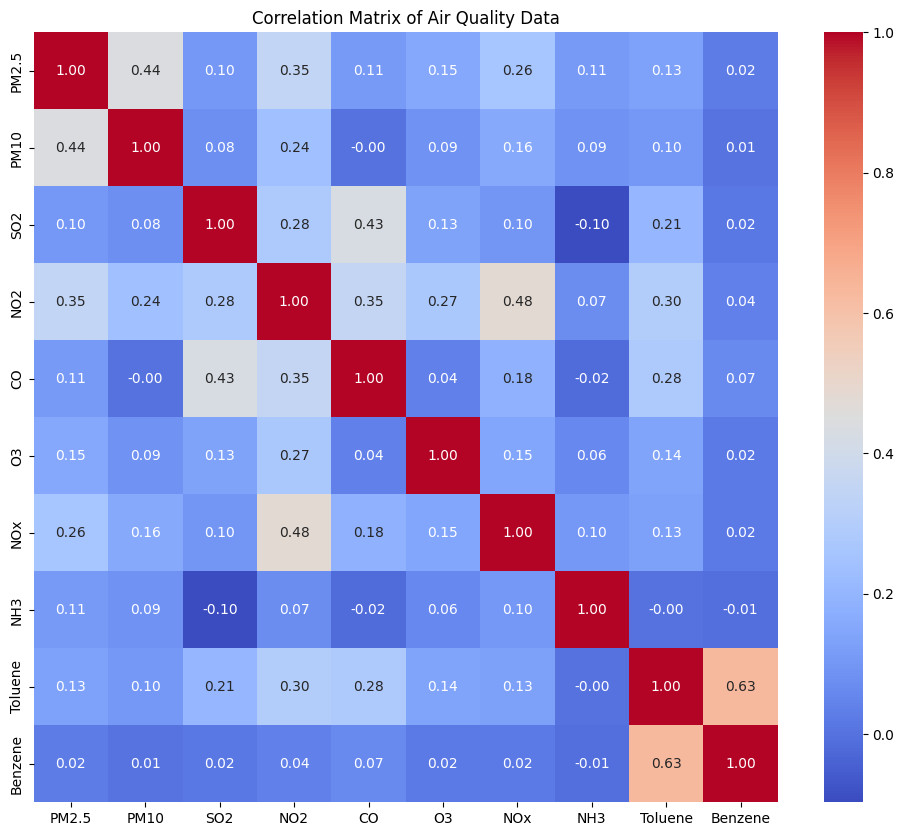

In [91]:
# Pollutants factors list
pollutants =df[['PM2.5', 'PM10', 'SO2','NO2', 'CO', 'O3','NOx','NH3','Toluene','Benzene']]

# Calculate the correlation matrix
correlation_matrix = pollutants.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

#### **Mean Monthly Concentration of Pollutant Factors**

In [92]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Year_Month'] = df['Date'].dt.to_period('M').astype(str)

pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

monthly_means = (
    df
    .groupby('Year_Month')[pollutants]
    .mean()
    .reset_index()
)

for pollutant in pollutants:

    fig = px.line(
        monthly_means,
        x='Year_Month',
        y=pollutant,
        markers=True,
        title='Monthly Mean ' + pollutant + ' Concentration Over Time',
        labels={
            'Year_Month': 'Year-Month',
            pollutant: 'Mean Concentration'
        }
    )

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()


#### **Seasonal Analysis**

In [93]:
# Functioning to fit the months into seasons
def season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

# Ensuring 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create the 'Season' column
df['Season'] = df['Date'].apply(season)


seasonal_avg = df.groupby('Season')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Melt the DataFrame for visualization
seasonal_avg_melted = pd.melt(seasonal_avg,
             id_vars=['Season'],
             var_name='Pollutant',
             value_name='Average Concentration')

# Define a specific order for seasons for better visualization
season_order = ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon']
seasonal_avg_melted['Season'] = pd.Categorical(seasonal_avg_melted['Season'], categories=season_order, ordered=True)

# Create a bar chart to visualize seasonal trends
fig = px.bar(seasonal_avg_melted,
             x='Season',
             y='Average Concentration',
             color='Pollutant',
             title='Average Pollutant Concentrations by Season',
             barmode='group')  # Use 'group' for grouped bars

fig.show()


# Machine Learning: AQI Regression Model

In order to further invesitagte the factors that drive poor air quality in India a regression model can be built to estimate AQI Index. this will be done using the concentration of different pollutants and patterns in temporal change.

Within this model, AQI is a continuous target variable, supossed to PM2.5, PM10, NO2, SO2, CO and O3 which are predictors.

A baseline linear regression model will be created and a Random Forest model will show the interaction between the pollutants in question and AQI. We can then check how well the model had worked by testing it on unseen data using RMSE and R squared.

RMSE - How far off the predictions are on average - Lower = better

R Squared - How well the model explains changes in AQI - Higher = Better

Finally, we will be able to tell which pollutant is most importnat in prediciting AQI, which is vital for overall pollution and Air Quality.

Linear Regression Results
RMSE: 60.241
R^2 : 0.802
---
Random Forest Regression Results
RMSE: 44.041
R^2 : 0.894


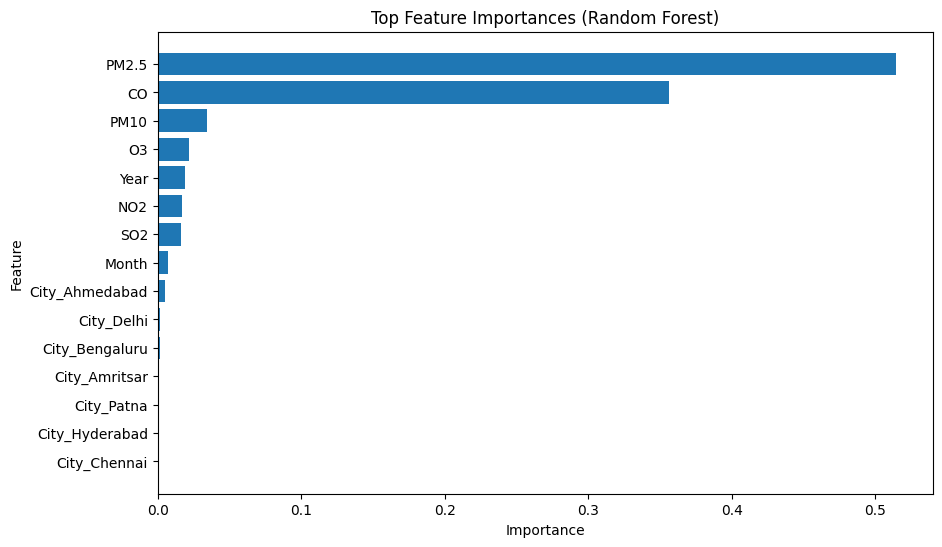

In [94]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt


df = df.copy()

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

feature_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Year', 'Month', 'City']
target_col = 'AQI'

df_model = df[feature_cols + [target_col]].dropna(subset=[target_col]).copy()

X = df_model[feature_cols]
y = df_model[target_col]

numeric_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Year', 'Month']
categorical_features = ['City']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = lin_mse ** 0.5
lin_r2 = r2_score(y_test, lin_pred)

print('Linear Regression Results')
print('RMSE:', round(lin_rmse, 3))
print('R^2 :', round(lin_r2, 3))
print('---')

rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest Regression Results')
print('RMSE:', round(rf_rmse, 3))
print('R^2 :', round(rf_r2, 3))


preprocessor_fitted = rf_model.named_steps['preprocess']
rf_estimator = rf_model.named_steps['model']

feature_names_num = numeric_features
feature_names_cat = (
    preprocessor_fitted
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

feature_names = np.concatenate([feature_names_num, feature_names_cat])

importances = rf_estimator.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

top_n = 15
top_features = feature_names[sorted_idx][:top_n]
top_importances = importances[sorted_idx][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.title('Top Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


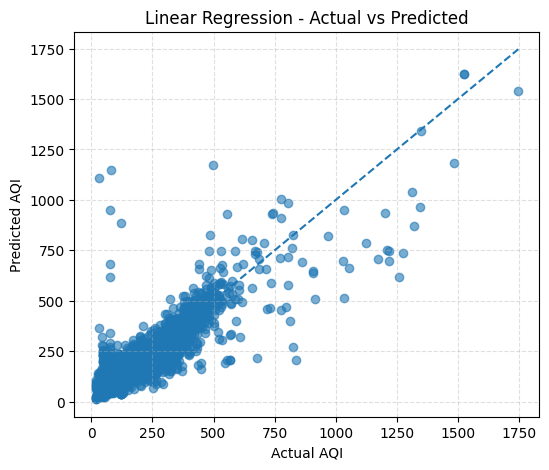

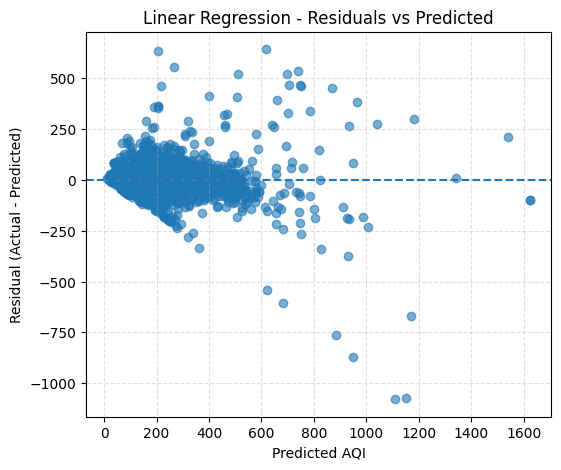

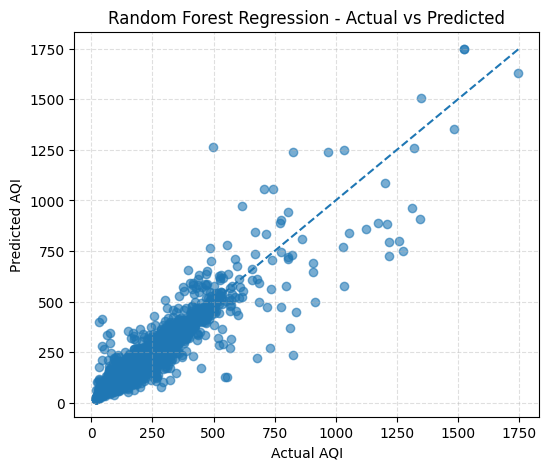

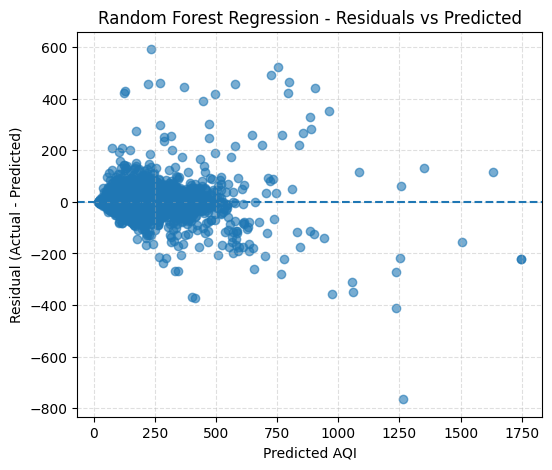

In [95]:
def actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             linestyle='--')
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(title + ' - Actual vs Predicted')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


def residuals_vs_predicted(y_true, y_pred, title):
    residuals = y_true - y_pred

    plt.figure(figsize=(6, 5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, linestyle='--')
    plt.xlabel('Predicted AQI')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.title(title + ' - Residuals vs Predicted')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


actual_vs_predicted(y_test, lin_pred, 'Linear Regression')
residuals_vs_predicted(y_test, lin_pred, 'Linear Regression')

actual_vs_predicted(y_test, rf_pred, 'Random Forest Regression')
residuals_vs_predicted(y_test, rf_pred, 'Random Forest Regression')